In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def rafikovwake(spiral,zeta,eta,rp,phip,hp):
    phi = []
    R = []
    for i in range(len(spiral[0])):
        r = np.sqrt(spiral[0][i]**2 + spiral[1][i]**2)
        R.append(r)
        phi.append(phip-(np.sign(r-rp)/hp)*((r/rp)**(1-eta) * ((1/(1-eta))-(1/(1-zeta+eta))*(r/rp)**(-zeta))-((1/(1+eta))-(1/(1-zeta+eta)))))
    return R, phi

def pitchangleprediction(spiral,nu,hp,rp,mover):
    R = []
    theta = []
    for i in range(len(spiral[0])):
        r = np.sqrt(spiral[0][i]**2 + spiral[1][i]**2)
        R.append(r)
        theta.append(np.arctan((rp/hp)*(r/rp)**(nu+1) * ((rp/r)**1.5 - 1) )* -180/np.pi + mover )
    return R, theta


def pitchanglepredictioninside(spiral,nu,hp,rp):
    R = []
    theta = []
    for i in range(len(spiral[0])):
        r = np.sqrt(spiral[0][i]**2 + spiral[1][i]**2)
        R.append(r)
        theta.append(np.arctan((rp/hp)*(r/rp)**(nu-0.5) )* 180/np.pi)
    return R, theta

def pitchangle(spiral):
    PA = []
    R = []
    for i in range(len(spiral[0])-1):
        R.append(np.sqrt(spiral[0][i]**2 + spiral[1][i]**2))
        PA.append(np.arctan(((((spiral[1][i+1]-spiral[1][i])/(spiral[0][i+1]-spiral[0][i]))+((spiral[0][i])/(spiral[1][i])))/(1-((spiral[1][i+1]-spiral[1][i])/(spiral[0][i+1]-spiral[0][i]))*(spiral[0][i]/spiral[1][i]))))*180/np.pi)
    return R,PA


def separationangle(spiral1,spiral2):
    phi = []
    R = []
    for i in range(len(spiral1[0])-1):
        R.append(np.sqrt(spiral1[0][i]**2 + spiral1[1][i]**2))
        m1 = (spiral1[1][i+1]-spiral1[1][i])/(spiral1[0][i+1]-spiral1[0][i])
        m2 = (spiral2[1][i+1]-spiral2[1][i])/(spiral2[0][i+1]-spiral2[0][i])
        phi.append(np.arctan(np.abs((m2-m1)/(1+ (m1*m2))))*180/np.pi)

    return R,phi

In [4]:
ATPyxDeproj = fits.open('fits/squaredanimage.fits')[0].data
ATPyxDeproj.shape


(140, 140)

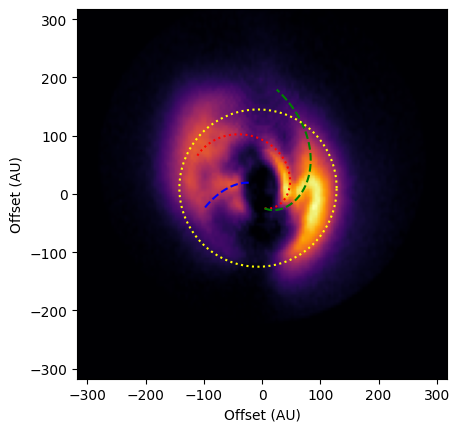

In [11]:
plt.imshow(ATPyxDeproj,cmap='inferno',origin='lower',extent=[-317.3,317.3,-317.3,317.3],vmin=0)
plt.xlabel('Offset (AU)')
plt.ylabel('Offset (AU)')

theta = np.radians(np.linspace(0,360*0.7,1000))
r = 25*np.exp(theta * 0.39)
x_2 = r*np.cos(theta-np.radians(80))+(0.3*theta**3)
y_2 = r*np.sin(theta-np.radians(80))+(0.12*theta**4)

for i in range(len(theta)):
    r[i] = np.sqrt(x_2[i]**2 + y_2[i]**2)
    theta[i] = np.arctan2(y_2[i],x_2[i])*180/np.pi

spiral1 = [x_2,y_2,r,theta]
plt.plot(x_2,y_2,linestyle='dotted',color='red')

theta = np.radians(np.linspace(0,360*0.7,1000))
r = 25*np.exp(theta * 0.39)
x_2 = r*np.cos(theta-np.radians(80))+(0.3*theta**3)
y_2 = r*np.sin(theta-np.radians(80))+(0.12*theta**4)
for i in range(len(theta)):
    r[i] = np.sqrt(x_2[i]**2 + y_2[i]**2)
    theta[i] = np.arctan2(y_2[i],x_2[i])*180/np.pi

spiral1true = [x_2,y_2,r,theta]    
#plt.plot(x_2,y_2,color='red')





theta = np.radians(np.linspace(0,360*0.45,1000))
r = 25*np.exp(theta * 0.7)
x_2 = r*np.cos(theta-np.radians(80))
y_2 = r*np.sin(theta-np.radians(80))
for i in range(len(theta)):
    theta[i] = np.arctan2(y_2[i],x_2[i])*180/np.pi
    
    r[i] = np.sqrt(x_2[i]**2 + y_2[i]**2)

spiral2 = [x_2,y_2,r,theta]

plt.plot(x_2,y_2,linestyle='dashed',color='green')

theta = np.radians(np.linspace(0,360*0.15,1000))
r = -30*np.exp(theta * 1.3)
x_2 = r*np.cos(theta-np.radians(40))
y_2 = r*np.sin(theta-np.radians(40))
spiral3 = [x_2,y_2]

plt.plot(x_2,y_2,linestyle='dashed',color='blue')

theta = np.radians(np.linspace(0,360*0.38,1000))
r = 25*np.exp(theta * 0.7)
x_2 = r*np.cos(theta-np.radians(80))
y_2 = r*np.sin(theta-np.radians(80))
for i in range(len(theta)):
    theta[i] = np.arctan2(y_2[i],x_2[i])*180/np.pi
    
    r[i] = np.sqrt(x_2[i]**2 + y_2[i]**2)

spiral4 = [x_2,y_2,r,theta]


phi = rafikovwake(spiral1,3/2,1/4,10,10,0.05)

x_1 = phi[0]*np.cos(phi[1])
y_1 = phi[1]*np.sin(phi[1])

#plt.plot(x_1,y_1,linestyle='dashed',color='yellow')

#theta = pitchangleprediction(spiral2,0,1.2,60)

#x_1 = theta[0]*np.cos(theta[1])
#y_1 = theta[1]*np.sin(theta[1])

#plt.plot(x_1,y_1,linestyle='dashed',color='yellow')

theta = np.radians(np.linspace(0,360,1000))
r = 135
x_2 = r*np.cos(theta)-7
y_2 = r*np.sin(theta)+10
plt.plot(x_2,y_2,color='yellow',linestyle='dotted')

#plt.savefig('spiralangleshit.png')


/tmp/ipykernel_4836/1321887386.py:34: RuntimeWarning: divide by zero encountered in scalar divide
  PA.append(np.arctan(((((spiral[1][i+1]-spiral[1][i])/(spiral[0][i+1]-spiral[0][i]))+((spiral[0][i])/(spiral[1][i])))/(1-((spiral[1][i+1]-spiral[1][i])/(spiral[0][i+1]-spiral[0][i]))*(spiral[0][i]/spiral[1][i]))))*180/np.pi)
/tmp/ipykernel_4836/1321887386.py:34: RuntimeWarning: invalid value encountered in scalar divide
  PA.append(np.arctan(((((spiral[1][i+1]-spiral[1][i])/(spiral[0][i+1]-spiral[0][i]))+((spiral[0][i])/(spiral[1][i])))/(1-((spiral[1][i+1]-spiral[1][i])/(spiral[0][i+1]-spiral[0][i]))*(spiral[0][i]/spiral[1][i]))))*180/np.pi)


Text(0, 0.5, 'Pitch Angle (degrees)')

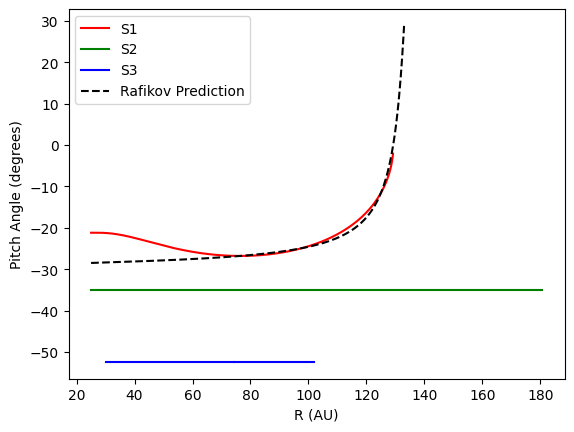

In [25]:
phi = rafikovwake(spiral2,3/2,1/4,5,0,0.4)
PA1 = pitchangle(spiral1)
PA2 = pitchangle(spiral2)
PA3 = pitchangle(spiral3)
pred = pitchangleprediction(spiral4,1/4,5,135,60)
pred1 = pitchanglepredictioninside(spiral2,100,0.4,180)


plt.plot(PA1[0],PA1[1],color='red')
plt.plot(PA2[0],PA2[1],color='green')
plt.plot(PA3[0],PA3[1],color='blue')
plt.plot(pred[0],pred[1],color='black',linestyle='dashed')
#plt.plot(pred1[0],pred1[1],color='black',linestyle='dotted')
#plt.plot(phi[0],phi[1],color='yellow',linestyle='dotted')
plt.legend(['S1','S2','S3','Rafikov Prediction','Rafikov Prediction (Reduced)'])
plt.xlabel('R (AU)')
plt.ylabel('Pitch Angle (degrees)')
#plt.savefig('PitchAngles')

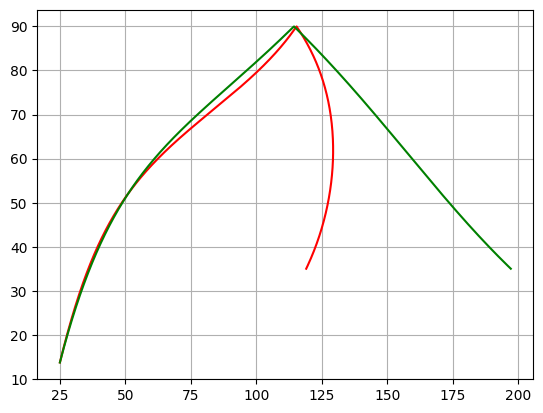

In [6]:
#INCORRECT INTERPRETATION - IT IS AZIMUTHAL SEPARATION

sep1 = separationangle(spiral1,spiral2)
sep2 = separationangle(spiral2,spiral1)

plt.plot(sep1[0],sep1[1],color='red')
plt.plot(sep2[0],sep2[1],color='green')
plt.locator_params(axis='y',nbins=10)
plt.grid()

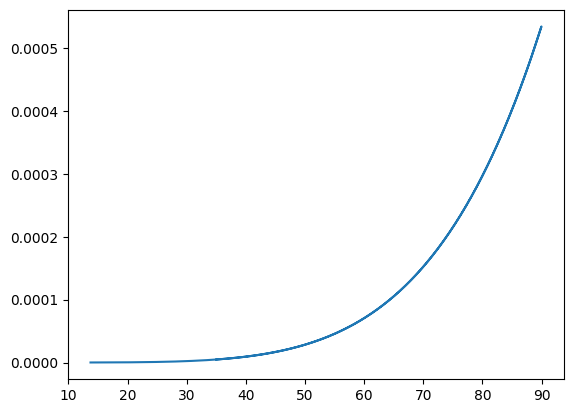

In [7]:


q = []
M = []
for i in range(len(sep1[1])):
    Q = (sep1[1][i]/102)**5 *0.001
    q.append(Q)
    M.append((Q*(1.23*2e30))/1.898e27)

plt.plot(sep1[1],q)

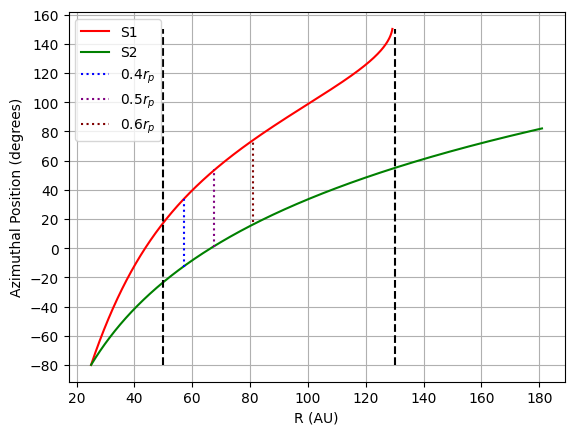

In [38]:
plt.plot(spiral1[2],spiral1[3],color='red')
plt.plot(spiral2[2],spiral2[3],color='green')
plt.plot(57*np.ones(50),np.linspace(-13,34),linestyle='dotted',color='blue')
plt.plot(67.5*np.ones(50),np.linspace(1,54),linestyle='dotted',color='purple')
plt.plot(81*np.ones(50),np.linspace(18,73),linestyle='dotted',color='maroon')
plt.plot(50*np.ones(50),np.linspace(-80,150),linestyle='dashed',color='black')
plt.plot(130*np.ones(50),np.linspace(-80,150),linestyle='dashed',color='black')

plt.locator_params(axis='y',nbins=20)
plt.grid()
plt.xlabel('R (AU)')
plt.ylabel('Azimuthal Position (degrees)')
plt.legend(['S1','S2','$0.4r_p$','$0.5r_p$','$0.6r_p$'])
#for separation of 75degrees - q = 2.15e-4 --> 0.25 Mjup
plt.savefig('AzimuthalSeparation.png')